In [132]:
import numpy as np
import matplotlib.pyplot as plt
from chapter_14 import *
from vectors import length
import math
import car_data
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

In [134]:
test_data = [
     (-1.0, -2.0137862606487387),
     (-0.9, -1.7730222478628337),
     (-0.8, -1.5510125944820812),
     (-0.7, -1.6071832453434687),
     (-0.6, -0.7530149734137868),
     (-0.5, -1.4185018340443283),
     (-0.4, -0.6055579756271128),
     (-0.3, -1.0067254915961406),
     (-0.2, -0.4382360549665138),
     (-0.1, -0.17621952751051906),
     (0.0, -0.12218090884626329),
     (0.1, 0.07428573423209717),
     (0.2, 0.4268795998864943),
     (0.3, 0.7254661223608084),
     (0.4, 0.04798697977420063),
     (0.5, 1.1578103735448106),
     (0.6, 1.5684111061340824),
     (0.7, 1.157745051031345),
     (0.8, 2.1744401978240675),
     (0.9, 1.6380001974121732),
     (1.0, 2.538951262545233)
]

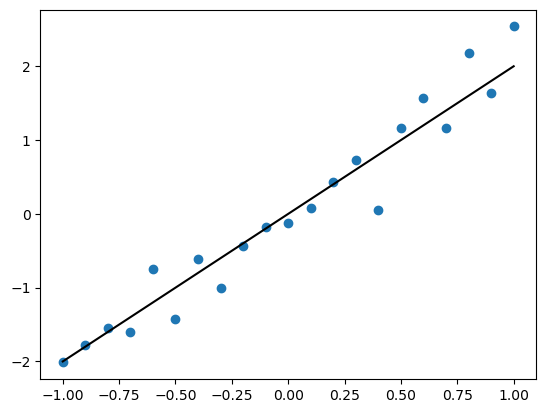

In [135]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
plot_function(lambda x: 2*x,-1,1,c='k')

In [136]:
def draw_cost(h, data):
    xs = [p[0] for p in data]
    ys = [p[1] for p in data]
    plt.scatter(xs, ys)
    plot_function(h, min(xs), max(xs), c='k')
    for point in data:
        x,y = point
        plt.plot([x,x], [y, h(x)], c='r')

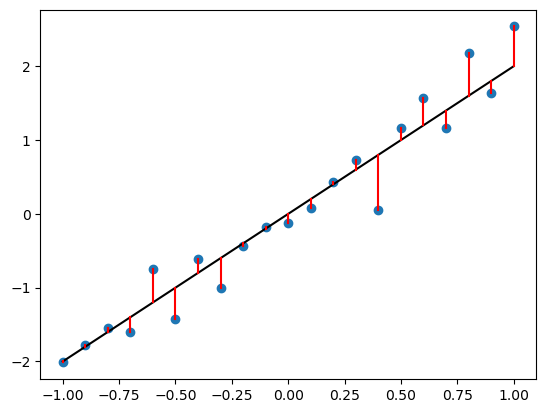

In [137]:
draw_cost(lambda x: 2*x, test_data)

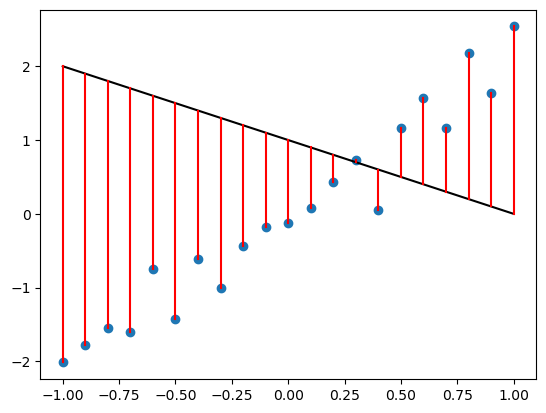

In [138]:
draw_cost(lambda x: 1 - x, test_data)

In [139]:
def sum_errors(f, data):
    errors = [abs(f(x) - y) for (x,y) in data]
    return sum(errors)

In [140]:
def f(x):
    return x * 2
def g(x):
    return 1 - x

In [141]:
sum_errors(f, test_data)

5.021727176394801

In [142]:
sum_errors(g, test_data)

38.47711311130152

In [143]:
def sum_squared_errors(f, data):
    errors = [(f(x) - y) ** 2 for (x,y) in data]
    return sum(errors)

In [144]:
sum_squared_errors(f, test_data)

2.105175107540148

In [145]:

sum_squared_errors(g, test_data)

97.1078879283203

Exercise 14.1: Create a set of data points lying on a line and demonstrate that the sum_error and sum_squared_error cost functions both return exactly zero for the appropriate linear function.

0
0


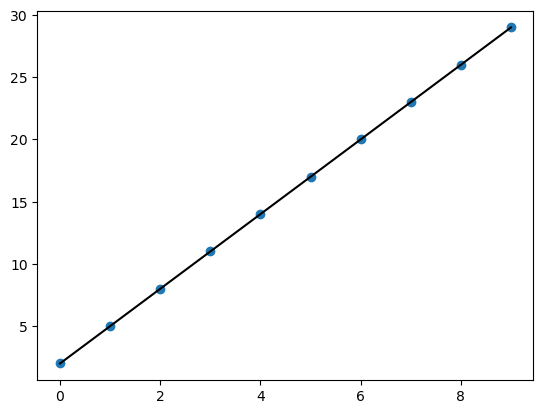

In [146]:
fn = lambda x: x * 3 + 2
points = [(x, fn(x)) for x in range(0, 10)]
print(sum_errors(fn, points))
print(sum_squared_errors(fn, points))
draw_cost(fn, points)

Exercise 14.2: Calculate the value of the cost for the two linear functions, x + 0.5 and 2x − 1. Which one produces a lower sum squared error relative to test_data, and what does that say about the quality of the fits?

In [147]:
def f1(x):
    return x + 0.5
def f2(x):
    return 2 * x - 1

In [148]:
print(sum_squared_errors(f1, test_data))
print(sum_squared_errors(f2, test_data))

16.607900877665685
23.1942461283472


Exercise 14.3: Find a linear function p4 that fits the data even better than p1, p2, or p3. Demonstrate that it is a better fit by showing the cost function is lower than for p1, p2, or p3.

In [149]:
sum_squared_errors(lambda x: x * 2.099 , test_data)

2.022513940767771

In [150]:
prius_mileage_price = [(p.mileage, p.price) for p in car_data.priuses]

In [151]:
def coefficient_cost(a,b):
    f = lambda x: a * x + b
    return sum_squared_errors(f, prius_mileage_price)

coefficient_cost(-0.4, 80_000)

831133388976.9598

In [152]:
def scaled_cost_function(c,d):
   return coefficient_cost(0.5*c,50000*d)/1e13

In [153]:
gradient_descent(scaled_cost_function,0, 0)

(-0.12111901781180315, 0.3149542288804173)

Exercise 14.6: Use gradient descent to find the linear function that best fits the test data. Your resulting function should be close to 2x + 0, but not exactly, because the data was randomly generated around that line.

In [154]:
def coefficient_cost_test_data(a, b):
    f = lambda x: a * x + b
    return sum_squared_errors(f, test_data)

In [155]:
gradient_descent(coefficient_cost_test_data, 1, 1)

(2.103718204728344, 0.0021207385859157535)

<Figure size 700x700 with 0 Axes>

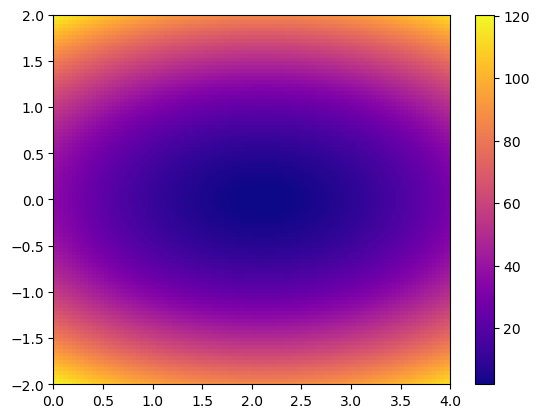

In [156]:
scalar_field_heatmap(coefficient_cost_test_data,-0,4,-2,2)

In [157]:
def exp_coefficient_cost(q,r):
    def f(x):
        return q* math.exp(r*x)
    return sum_squared_errors(f,prius_mileage_price)

<Figure size 700x700 with 0 Axes>

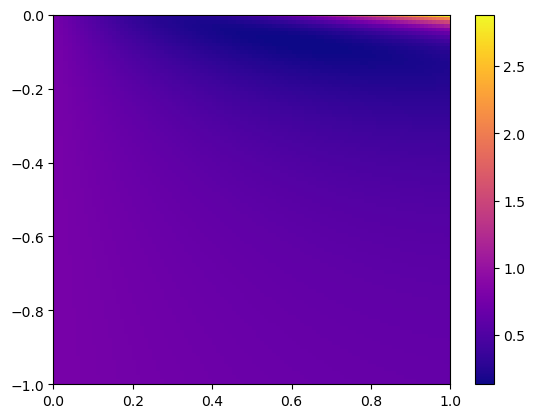

In [158]:
def scaled_exp_coefficient_cost(s,t):
   return exp_coefficient_cost(30000*s,1e-4*t) / 1e11

scalar_field_heatmap(scaled_exp_coefficient_cost,0,1,-1,0)